<a href="https://colab.research.google.com/github/PrateekCoder/lets_data_science/blob/main/Perceptron_Unleashing_the_Power_of_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset (IRIS)

In [2]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

## Prepare the Dataset

In [3]:
# Filtering the dataframe to include only Setosa and Versicolor
iris_df = iris_df[iris_df['target'] < 2]

# We'll also only use two features - sepal length and petal length, for simplicity
X = iris_df[['sepal length (cm)', 'petal length (cm)']].values
y = iris_df['target'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Train the Model (Perceptron)

In [4]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)

# Train the perceptron
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

## Make Prediction Using Trained Model

In [5]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = ppn.predict(X_test)

## Evaluate the Model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



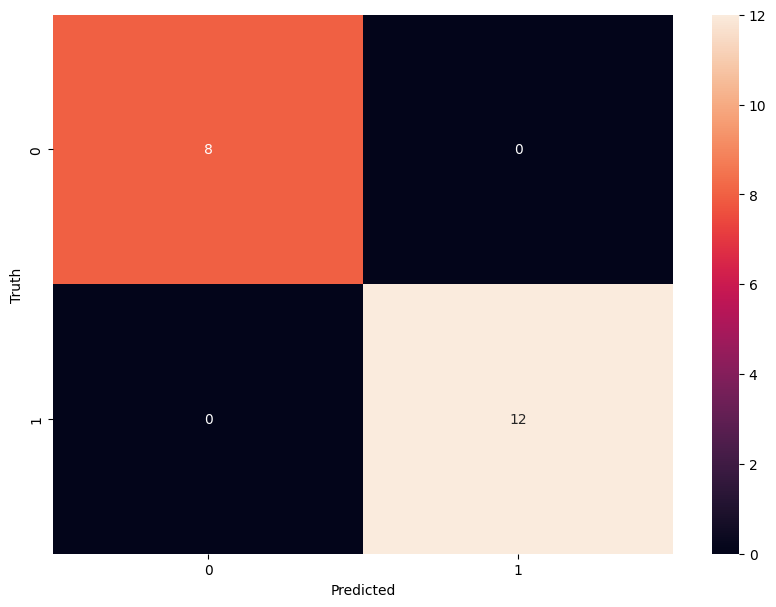

In [6]:
# Use the sklearn function 'confusion_matrix' to create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print a classification report
print(classification_report(y_test, y_pred))